In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
df = pd.read_csv('CH01PR22.txt', sep = '\s+', header = None, names = ['the hardness of the plastic','the elapsed time'])
df.head()

,the hardness of the plastic,the elapsed time
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0


## a

In [23]:
X = df['the elapsed time']
Y = df['the hardness of the plastic']
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_err = X - X_bar
Y_err = Y - Y_bar
print(X_bar, Y_bar)
X_err.head()

28.0 225.5625


0   -12.0
1   -12.0
2   -12.0
3   -12.0
4    -4.0
Name: the elapsed time, dtype: float64

In [24]:
A = np.sum(X_err*Y_err)
B = np.sum(X_err**2)
print(A,'\n',B)

2604.0 
 1280.0


In [25]:
b1 = A / B
b0 = Y_bar - b1*X_bar
print(b1, b0)

2.034375 168.60000000000002


In [26]:
n= len(X)
Y_hat = b0 + b1 * X
resid = Y - Y_hat

In [27]:
SSE = np.sum((Y - Y_hat)**2)
MSE = SSE / (n-2)
print(MSE, SSE)

10.458928571428588 146.42500000000024


In [28]:
SSR = np.sum((Y_hat - Y_bar)**2)
MSR = SSR/1
SSR

5297.512499999998

In [29]:
SSTO = SSE + SSR
SSTO

5443.937499999998

In [30]:
model = smf.ols('Y ~ X', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           2.16e-12
Time:                        19:14:19   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

C:\Users\PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
anova_result = sm.stats.anova_lm(results, typ=2)
print(anova_result)

             sum_sq    df           F        PR(>F)
X         5297.5125   1.0  506.506232  2.158814e-12
Residual   146.4250  14.0         NaN           NaN


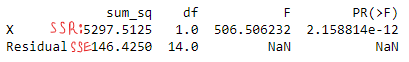

**MODEL Y = 168.6 + 2.03X**

## b

The alternative conclusions are:

H0 : β1 == 0

Ha : β1 != 0

In [32]:
alpha = 0.01
f = stats.f.ppf(q = 1 - alpha, dfn = 1, dfd = n-2)
f

8.861592665176424

The decision rule is:

If F* <= 8.86, conclude H0

If F* >= 8.86, conclude Ha

In [33]:
# F star is:
f_star = MSR /MSE
f_star

506.50623185931266

Since F* = 506.5 > F = 8.86, we conclude Ha, that B1 != 0, or that there is a linear assiciation between X and Y.

## c

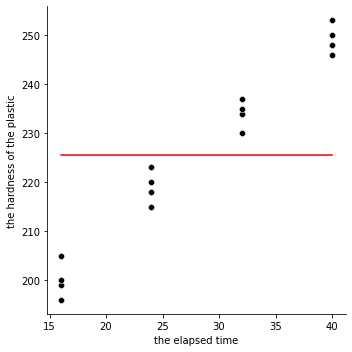

In [57]:
#Plot the deviations 𝑌𝑖 − 𝑌𝑖_hat against 𝑋𝑖
sns.relplot(x ='the elapsed time', y ='the hardness of the plastic',data=df, color ='black')
x =np.linspace(20,120,20);
sns.scatterplot(x='the elapsed time', y='the hardness of the plastic', data=df, color = 'black')
sns.lineplot(x ='the elapsed time', y= Y_bar, data=df,color = 'red')
plt.show()

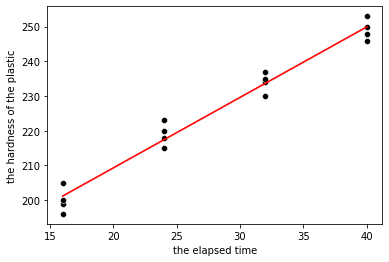

In [54]:
#Plot the deviations Y𝑖_hat − 𝑌_bar against 𝑋𝑖
sns.scatterplot(x='the elapsed time', y='the hardness of the plastic', data=df, color = 'black')
sns.lineplot(x='the elapsed time', y= Y_hat, data=df, color = 'red')
plt.show()

On the graphs, it is apparent that the residuals Yi − Yi_hat much smaller than the deviations Yi_hat − Y_bar of the predictors from the mean.  Thus the SSR should be much larger than the SSE, and we expect R^2 = SSR /SSTO to be close to 1.

## d

In [16]:
# Coefficient of determination:
R2 = SSR/SSTO
r = np.sqrt(R2)
print(R2,r)

0.9731031078148857 0.9864598865716161


R^2 = 0.973 and r = 0.986